AttributeError: 'GraphFrame' object has no attribute 'button'

SystemExit: OnInit returned false, exiting...

C:\Users\loret\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


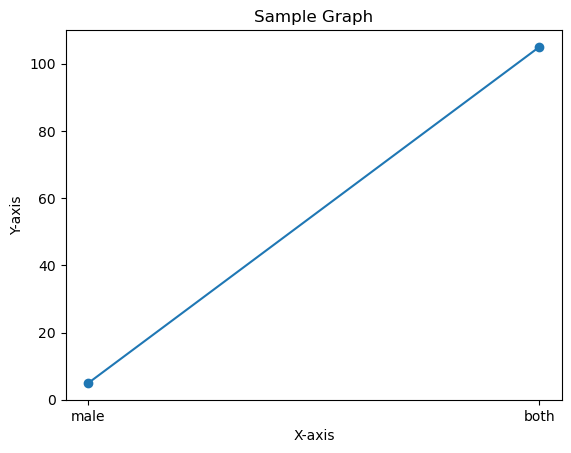

In [1]:
import customtkinter
import wx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas

customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("dark-blue")

class GraphFrame(wx.Frame):
    def __init__(self, parent, title):
        super(GraphFrame, self).__init__(parent, title=title, size=(800, 600))

        # Panel for placing the graph
        self.panel = wx.Panel(self)

        # Load data from Excel sheet
        self.load_excel_data()

        # Create a plot
        self.plot_graph()

        # Button to trigger the for loop and function call
        self.button = wx.Button(self.panel, label='Update Graph', pos=(10, 10))
        self.button.Bind(wx.EVT_BUTTON, self.on_button_click)

    def load_excel_data(self):
        # Load data from an Excel sheet
        self.df = pd.read_excel('sample_dataFrame.xlsx')
        self.x_data = self.df['sex']  # Assuming 'X' is the column name for x-axis data
        self.y_data = self.df['sample_size']  # Assuming 'Y' is the column name for y-axis data

    def plot_graph(self):
        # Create a figure and axis
        self.fig, self.ax = plt.subplots()

        # Initial plot with all data
        self.line, = self.ax.plot(self.x_data, self.y_data, marker='o')

        # Set labels and title
        self.ax.set_xlabel('X-axis')
        self.ax.set_ylabel('Y-axis')
        self.ax.set_title('Sample Graph')

        # Embed the plot in wxPython panel
        self.canvas = FigureCanvas(self.panel, -1, self.fig)

        # Layout
        sizer = wx.BoxSizer(wx.VERTICAL)
        sizer.Add(self.canvas, 1, wx.EXPAND)
        sizer.Add(self.button, 0, wx.ALIGN_CENTER | wx.TOP, 10)
        self.panel.SetSizer(sizer)

    def on_button_click(self, event):
        # Function to be called in the for loop
        def update_point(index):
            new_y_value = self.y_data[index] + 10  # Example modification
            self.y_data[index] = new_y_value

        # For loop that calls the update_point function
        for i in range(len(self.y_data)):
            update_point(i)

        # Update the graph with new data
        self.line.set_ydata(self.y_data)
        self.canvas.draw()

class MyApp(wx.App):
    def OnInit(self):
        frame = GraphFrame(None, title='Excel Data Graph')
        frame.Show()
        return True

if __name__ == '__main__':
    app = MyApp(False)
    app.MainLoop()